In [1]:
i = 2;
load("2018级研究生小作业-阶已知线性差分方程输入输出数据\data00"+ i +"_OrderKnown");


In [2]:
del %延时


del =

     2




In [3]:
na %A多项式阶次


na =

     3




In [4]:
nb %B多项式阶次


nb =

     1




In [5]:
nc %c多项式阶次


nc =

     1




In [9]:
size(u)


ans =

   501     1




In [6]:
n_a = na;
n_b = nb+del;
n_c = nc;
rho = 0.99;

In [7]:
num_p = n_a + n_b + 1 + n_c;

theta = 1e-3 * ones(num_p, 1);
P = 1e6 * eye(num_p);
xi = y;

for k = max([n_a n_b n_c])+1:size(u,1)
    x = [-y(k-1:-1:k-n_a) ; u(k:-1:k-n_b) ; xi(k-1:-1:k-n_c)];
    K = P * x /(rho + x' * P * x);
    theta = theta + K * (y(k) - x' * theta);
    P = 1/rho * (eye(num_p) - K * x') * P;
    xi(k) = y(k) - x' * theta;
end


In [8]:
theta


theta =

    0.2504
    0.2389
    0.3518
    0.0179
   -0.0045
    7.9859
    7.9909
    0.2930




这结果不对啊。。

它这阶数是算了延迟后往后推的，所以直接用我的未知阶的算法（其实直接不把那两列加进来更好）要把阶加上去。

In [9]:
for n_a = 1:5
    for n_b = 1:5
        for n_c = 1:5
            %y = data(:,1,di);
            %u = data(:,2,di);
            [theta, P, xi] = rels(y,u,n_a,n_b,n_c,rho);
            aic = get_aic(xi, n_a+n_b+n_c+1);
            aic_arr(n_a,n_b,n_c) = aic;
        end
    end
end


In [10]:
aic_arr


aic_arr(:,:,1) =

   1.0e+03 *

    1.6848    1.5280    1.2846    1.1772    1.0220
    1.5966    0.9714    0.7200    0.6921    0.6406
    1.5929    0.8984   -0.2810    0.5406    0.5617
    1.5834    0.9156    0.5406    0.5423    0.5635
    1.5748    0.8890    0.5617    0.5635    0.5653


aic_arr(:,:,2) =

   1.0e+03 *

    1.6398    1.4872    1.2866    1.0776    1.0030
    1.5922    0.9302    0.6998    0.6898    0.6335
    1.5867    0.8397   -0.2809    0.5426    0.5635
    1.5744    0.8761    0.5426    0.5442    0.5654
    1.5653    0.8322    0.5635    0.5654    0.5673


aic_arr(:,:,3) =

   1.0e+03 *

    1.6283    1.4726    1.2365    1.0747    0.9804
    1.5784    0.9139    0.6700    0.6885    0.6347
    1.5702    0.8043   -0.2807    0.5446    0.5655
    1.5642    0.8656    0.5446    0.5462    0.5674
    1.5523    0.8106    0.5655    0.5674    0.5693


aic_arr(:,:,4) =

   1.0e+03 *

    1.6388    1.4714    1.2460    1.0755    0.9801
    1.5647    0.9872    0.8036    0.6888    0.635

In [11]:
[min_aic,min_a,min_b,min_c] = min3d(aic_arr)


min_aic =

 -280.9552


min_a =

     3


min_b =

     3


min_c =

     1




In [12]:
theta = rels(y,u,3,3,1,rho)


theta =

    0.2504
    0.2389
    0.3518
    0.0179
   -0.0045
    7.9859
    7.9909
    0.2930




接下来我们要画那个迭代参数变化图。话说用最小二乘法的话哪来那个图。。

In [13]:
num_p = n_a + n_b + 1 + n_c;

theta = 1e-3 * ones(num_p, 1);
P = 1e6 * eye(num_p);
xi = y;


for k = max([n_a n_b n_c])+1:size(u,1)
    x = [-y(k-1:-1:k-n_a) ; u(k:-1:k-n_b) ; xi(k-1:-1:k-n_c)];
    K = P * x /(rho + x' * P * x);
    theta = theta + K * (y(k) - x' * theta);
    thetas(:,k) = theta;
    P = 1/rho * (eye(num_p) - K * x') * P;
    xi(k) = y(k) - x' * theta;
end


In [14]:
size(thetas)


ans =

    16   501




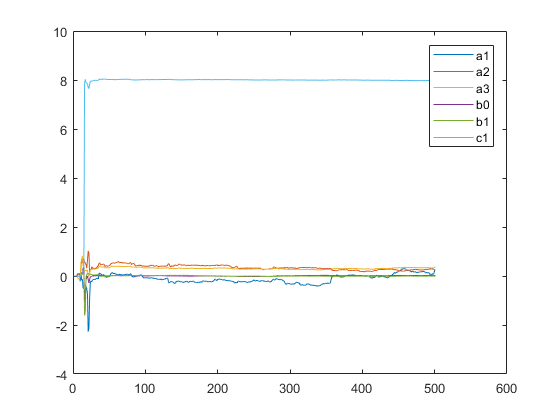

In [15]:
figure
plot(thetas(1,:));
hold on
plot(thetas(2,:));
plot(thetas(3,:));
plot(thetas(6,:));
plot(thetas(7,:));
plot(thetas(8,:));

hold off
legend('a1','a2','a3','b0','b1','c1')


这里我们试试那种轮换搜索d的方法能否得到正确的阶数

In [7]:
min_aic = inf;


for n_a = 1:5
    for n_b = 0:5
        for n_c = 0:5
            for d = 0:n_b
                [theta, P, xi] = relsd(y, u, n_a, n_b, n_c, d, rho);
                %aic = get_aic(xi, n_a+n_b+n_c+1-d);
                aic = get_aic(refine_xi(y, u, n_a, n_b, n_c, d, 0.99, theta),n_a+n_b+n_c+1-d);
                if(aic < min_aic)
                    min_aic = aic;
                    min_a = n_a;
                    min_b = n_b;
                    min_c = n_c;
                    min_d = d;
                end
            end
        end
    end
end


In [8]:
[min_a,min_b,min_c,min_d]


ans =

     3     3     1     2





ans =

     8   501


theta =

    0.2504
    0.2389
    0.3518
    0.0179
   -0.0045
    7.9859
    7.9909
    0.2930


aic =

 -280.9552

> In legend>set_children_and_strings (line 674)
  In legend>make_legend (line 346)
  In legend (line 294)
  In plot_trace (line 9)



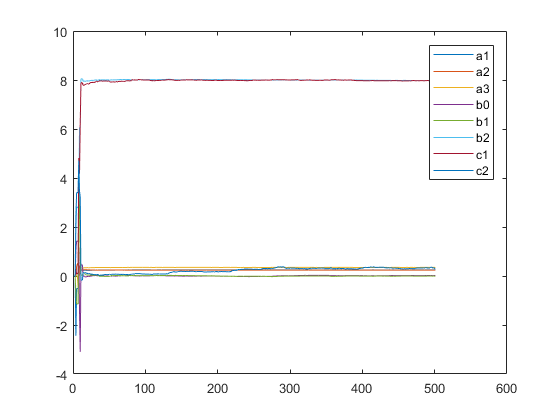

In [37]:
n_a = min_a;
n_b = min_b;
n_c = min_c;
d = min_d;

clear thetas

[theta, P, xi, thetas] = relsd(y, u, n_a, n_b, n_c, d, 0.99);
size(thetas)
theta
aic = get_aic(xi, n_a+n_b+n_c+1-d)

plot_trace(thetas, 1:length(theta), ["a1","a2","a3","b0","b1","b2","c1","c2","c3"])


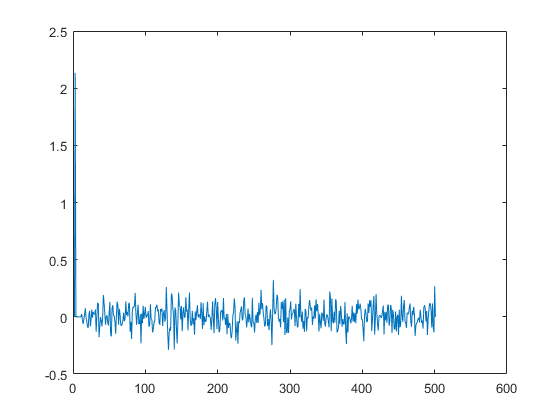

In [39]:
plot(xi)

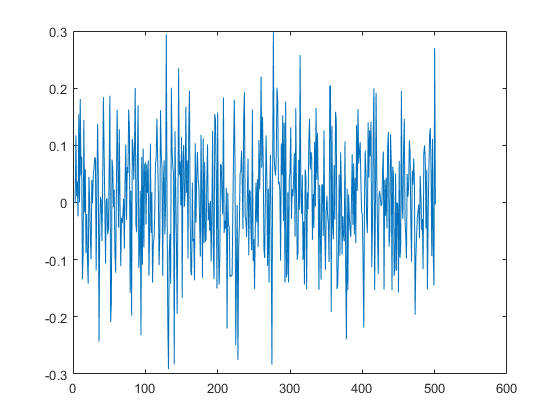

In [44]:
plot(refine_xi(y, u, n_a, n_b, n_c, d, 0.99, theta))

In [45]:
get_aic(refine_xi(y, u, n_a, n_b, n_c, d, 0.99, theta),n_a+n_b+n_c+1-d)


ans =

 -421.2412




In [46]:
k = n_a+n_b+n_c+1-d;

mu = mean(xi)
sd = std(xi)
logprob = -sum(((xi - mu)/sd).^2/2) - log(sqrt(2*pi)*sd)*size(xi,1)
aic = 2*k - logprob



mu =

    0.0088


sd =

    0.1339


logprob =

  296.9552


aic =

 -280.9552





ans =

     6   501


theta =

    0.2510
    0.2386
    0.3521
    7.9851
    7.9943
    0.3047


aic =

 -278.9017

> In legend>set_children_and_strings (line 674)
  In legend>make_legend (line 346)
  In legend (line 294)
  In plot_trace (line 9)



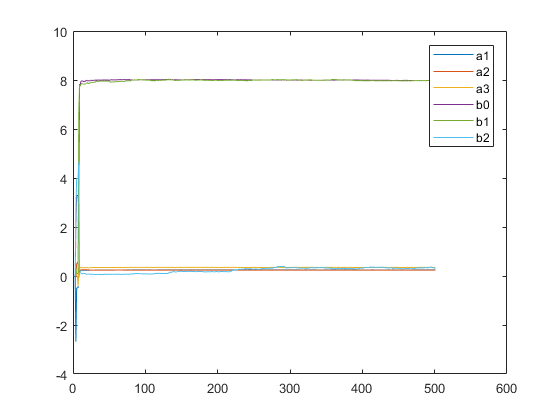

In [47]:
n_a = 3;
n_b = 3;
n_c = 1;
d = 2;

clear thetas

[theta, P, xi, thetas] = relsd(y, u, n_a, n_b, n_c, d, 0.99);
size(thetas)
theta
aic = get_aic(xi, n_a+n_b+n_c+1-d)

plot_trace(thetas, 1:length(theta), ["a1","a2","a3","b0","b1","b2","c1","c2","c3"])


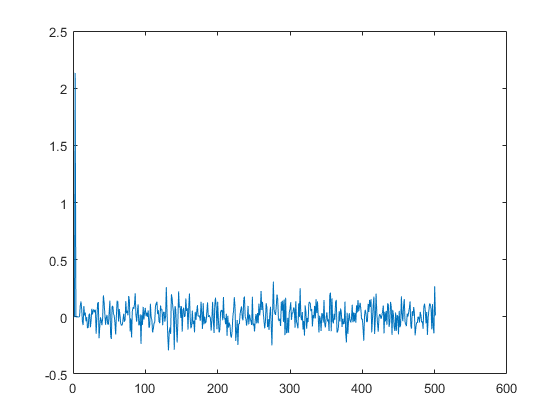

In [48]:
plot(xi)

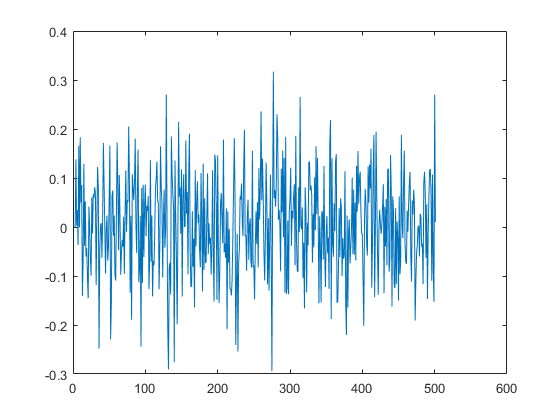

In [49]:
plot(refine_xi(y, u, n_a, n_b, n_c, d, 0.99, theta))

In [50]:
get_aic(refine_xi(y, u, n_a, n_b, n_c, d, 0.99, theta), n_a+n_b+n_c+1-d)


ans =

 -424.6867




In [32]:
k = n_a+n_b+n_c+1-d;

mu = mean(xi)
sd = std(xi)
logprob = -sum(((xi - mu)/sd).^2/2) - log(sqrt(2*pi)*sd)*size(xi,1)
aic = 2*k - logprob



mu =

    0.0095


sd =

    0.1355


logprob =

  290.9017


aic =

 -278.9017




In [31]:
k


k =

   501


